# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single DataFrame
combine = pd.merge(study_results,mouse_metadata, how = 'outer',
                      on='Mouse ID')

# Display the data table for preview
combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
number_mice = combine ["Mouse ID"].nunique()
number_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#https://stackoverflow.com/questions/5419204/index-of-duplicates-items-in-a-python-list
dups_df = combine.set_index('Mouse ID')
dups_df.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
#https://stackoverflow.com/questions/5419204/index-of-duplicates-items-in-a-python-list
clean_combine=dups_df.drop(['g989'])


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_combines= clean_combine.reset_index()
clean_mice=clean_combines ["Mouse ID"].nunique()
clean_mice


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
clean_drug= clean_combines.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
clean_mean = clean_drug ["Tumor Volume (mm3)"].mean()
clean_median = clean_drug ["Tumor Volume (mm3)"].median()
clean_var = clean_drug ["Tumor Volume (mm3)"].var()
clean_std = clean_drug ["Tumor Volume (mm3)"].std()
clean_sem = clean_drug ["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
clean_df = pd.DataFrame({"Mean Tumor Volume":clean_mean,
                         "Median Tumor Volume":clean_median,
                         "Tumor Volume Variance":clean_var,
                         "Tumor Volume Std. Dev.":clean_std,
                         "Tumor Volume Std. Err.":clean_sem,
    
})
clean_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
sing_sum = pd.DataFrame({"Mean":clean_mean,
                         "Median":clean_median,
                         "Variance":clean_var,
                         "Standard Dev":clean_std,
                         "SEM":clean_sem,
    
})
sing_sum

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

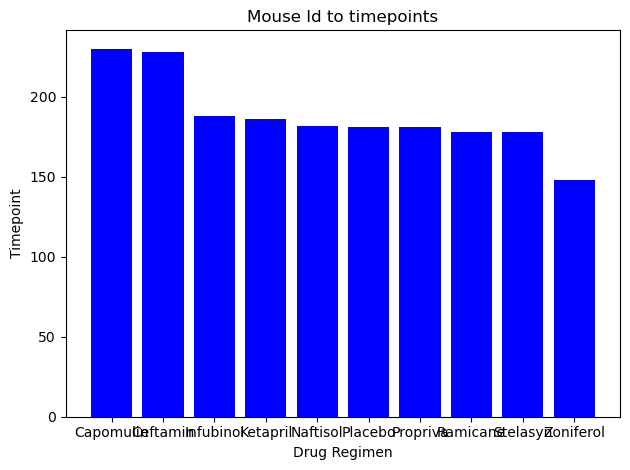

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
y_axis1 = clean_combines["Drug Regimen"].value_counts()
x_axis1= ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
plt.bar(x_axis1,y_axis1,color="b",align ="center")
plt.title( "Mouse Id to timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.tight_layout()
plt.show()

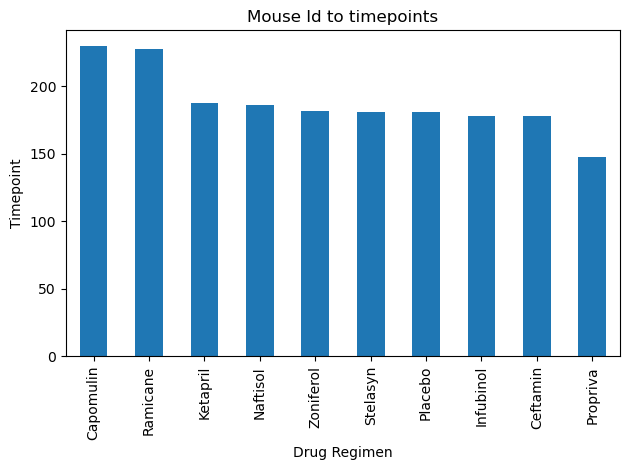

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pybar = clean_combines["Drug Regimen"].value_counts()
pybar.plot(kind ="bar",title = "Mouse Id to timepoints",
xlabel = ("Drug Regimen"),
ylabel = ("Timepoint"))
plt.tight_layout()
plt.show()

<Axes: ylabel='Sex'>

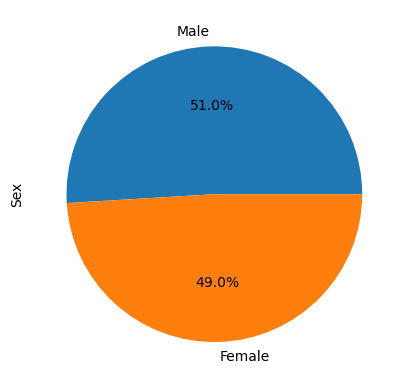

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Sex = clean_combines["Sex"].value_counts()
Sex.plot.pie(startangle =0,autopct="%1.1f%%")

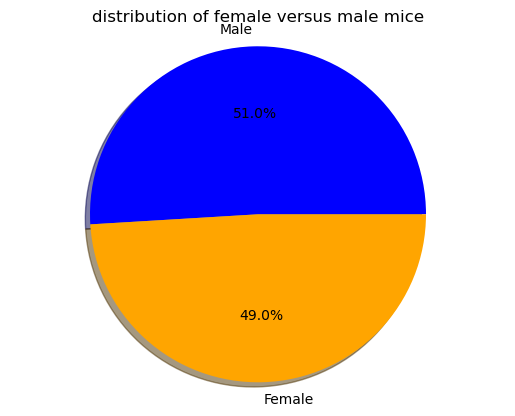

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex = clean_combines["Sex"].value_counts()
Gender = ["Male","Female"]
color = ["blue","Orange"]
explode = 0,0
plt.title("distribution of female versus male mice")
plt.pie(Sex, explode=explode, labels=Gender, colors=color,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

NameError: name 'years' is not defined

## Correlation and Regression

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight = clean_combines["Weight (g)"]
Capomulin_vol = clean_combines.groupby(["Drug Regimen"])

#tumour_volume = Capomulin_vol["Capomulin"].mean()
#tumour_volume.plot(kind="scatter", x="weight", y="tumour_volume", grid=True, figsize=(8,8),title="MPG Vs. Horsepower")

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
